This file implement an FER baseline model, using SVM. Adapted from https://github.com/whimian/SVM-Image-Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.transform import resize
from sklearn.utils.multiclass import unique_labels
import random

In [2]:
def load_image_files(path_to_dir, dimension=(128, 128)):
    image_dir = Path(path_to_dir)
    folders = [dir for dir in image_dir.iterdir() if dir.is_dir()]
    categories = [f.name for f in folders]

    descr = "imgae dataset categorized"
    target = []
    flat_data = []
    images = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
train_set = load_image_files("base_img/train")

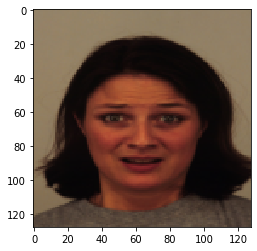

In [4]:
#print(train_set)
img = train_set['images'][0]
#print(img)
imgplot = plt.imshow(img)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
train_set.data, train_set.target, test_size=0.01,random_state=999)
#X_train = train_set.data
#y_train = train_set.target

In [6]:

svc = svm.SVC()

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [1, 10, 100, 1000], 'gamma': [0.001], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)


C:\Users\cyf98\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cyf98\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Classification report for classifier GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.38      0.79      0.51        14
           1       0.69      0.79      0.73        14
           2       0.82      0.64      0.72        14
           3       0.92      0.79      0.85        14
           4       0.75      0.43      0.55  

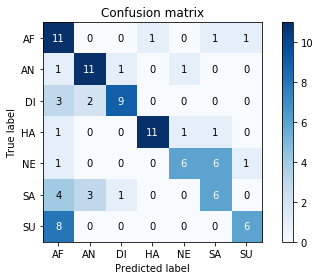

In [7]:
test_set = load_image_files("base_img/val")
X_test = test_set.data
y_test = test_set.target
y_pred = clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = ['','AF','AN','DI', 'HA','NE','SA','SU']
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')
plt.show()

Afraid = AF
Angry = AN
Disgust = DI
Happy = HA
Neutral = NE
Sad = SA
Surprise = SU
Actual (predicted)


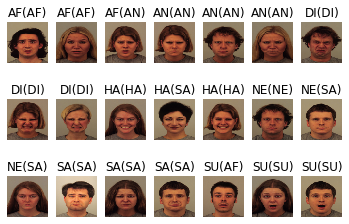

In [8]:
new_test = load_image_files("base_img/test")
#imgplot = plt.imshow(new_test['images'][0])
prediction = clf.predict((new_test.data))
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['AF','AN','DI', 'HA','NE','SA','SU']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])
print("Actual (predicted)")
k = 0
c = 3
r = 7
for i in range(r):
    rand_list = random.sample(range(14), c)
    for j in rand_list:
        plt.subplot(c, r, k+1)
        plt.title(abbr[new_test.target[14*i+j]] + "(" + abbr[prediction[14*i+j]]+ ")")
        plt.axis('off')
        plt.imshow(new_test['images'][14*i+j])
        k+=1


Afraid = AF
Angry = AN
Disgust = DI
Happy = HA
Neutral = NE
Sad = SA
Surprise = SU
Actual (predicted)


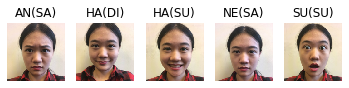

In [9]:
new_test = load_image_files("base_img/new_test")
#imgplot = plt.imshow(new_test['images'][0])
prediction = clf.predict((new_test.data))
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['AF','AN','DI', 'HA','NE','SA','SU']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])

print("Actual (predicted)")

for i in range(len(new_test['images'])):
    plt.subplot(1, 5, i+1)
    plt.title(abbr[new_test.target[i]] + "(" + abbr[prediction[i]]+ ")")
    plt.axis('off')
    plt.imshow(new_test['images'][i])